In [1]:
import os
import matplotlib
import json
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd


# Configure font
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# Method to print otu the mean, median, std, min, max of a dataframe (pandas)
def mms(frame, stat=None):
    if not stat:
        stat=''
        mean, med, std, _min, _max = round(frame.mean(), 2), round(frame.median(), 2), round(frame.std(), 2), frame.min(), frame.max()
    else:
        fs = frame[stat]
        mean, med, std, _min, _max = round(fs.mean(), 2), round(fs.median(), 2), round(fs.std(), 2), fs.min(), fs.max()
    print(f'[STAT-{stat}] mean:{mean}, median:{med}, std:{std}, min::{_min}, max:{_max}')


# Parsing Files
Change *data_dir* to the corresponding directory of ad and tracker bytes.
Example directory hierarchy:
* nb_tracker_and_ads
  * 13
    * 0.json
  * 14
    * 0.json
  * 15
    * 0.json
    
 
Change this parsing function as needed. The goal here is to append rows of data to the *data* list

In [2]:
data = []
data_dir = './nb_tracker_and_ads' ## modify accordingly, or parse data however you want.

for server in os.listdir(data_dir):
    for txt in os.listdir(os.path.join(data_dir,server)):
        with open(os.path.join(data_dir,server,txt)) as f:
            data.append(json.load(f))

In [3]:
## Convert data into a Pandas Dataframe

div = 1024 # Number of bytes in megabyte

new_data = []
for compact in data:
    for URL, d in compact.items():
        new_data.append([URL, d['a']/div, d['t']/div])
        
df = pd.DataFrame(new_data, columns=['URL','Ad Bytes', 'Tracker Bytes'])


In [4]:
df ## display dataframe

,URL,Ad Bytes,Tracker Bytes
0,excelonline.in,0.000000,0.000000
1,psfcrane.com,0.000000,0.000000
2,lapostemobile.fr,0.000000,58.735352
3,themanechoice.com,0.123047,106.824219
4,internetri.net,289.186523,18.211914
...,...,...,...
679030,aanhadigital.com,137.246094,53.995117
679031,digitaltrainingacademy.com,0.000000,33.599609
679032,mazenod.vic.edu.au,0.000000,46.004883
679033,interkontakt.net,0.000000,70.820312


# Displaying the Charts
Display the std and median charts without any filtering.

In [6]:
## Calculate the different medians for ads and tracker bytes

# Medians
ad_median = df['Ad Bytes'].median()
tracker_median = df['Tracker Bytes'].median()

# Standard deviations
std = df.std(axis=0)
astd=std['Ad Bytes']
tstd=std['Tracker Bytes']

# Update the dataframe to just include standard deviation and medians
new_data=pd.DataFrame([['Ads',ad_median, astd], 
                       ['Trackers',tracker_median, tstd],
                      ],
                      columns=['Byte Category', 'Kilobytes', 'err'])
new_data

,Byte Category,Kilobytes,err
0,Ads,0.000000,262.076657
1,Trackers,28.742188,96.362566


[STAT-Ad Bytes] mean:47.32, median:0.0, std:262.08, min::-0.017578125, max:43826.0009765625
[STAT-Tracker Bytes] mean:53.67, median:28.74, std:96.36, min::-0.0751953125, max:16477.8173828125


<Figure size 432x288 with 0 Axes>

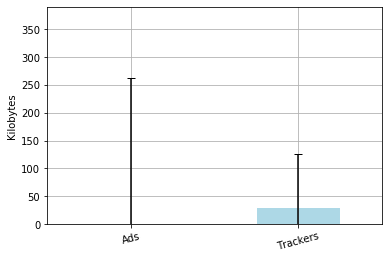

In [8]:

fig = plt.figure()
rax = new_data.plot.bar(x='Byte Category', y='Kilobytes', yerr='err', rot=15, capsize=4, color='lightblue', grid=True, ylim=[0,400000.4/div])
rax.set_ylabel('Kilobytes')
rax.set_xlabel('')
#rax.legend(loc='upper left')
rax.get_legend().remove()
plt.savefig('unfiltered.pdf', bbox_inches='tight', dpi=fig.dpi)
mms(df, 'Ad Bytes')
mms(df, 'Tracker Bytes')

# Filter Plot
* We can't see the median of the ads... So let's filter for when the ad_bytes > 0
* Let's also do the same for the trackers for rows where tracker_bytes > 0

Ads:------
[STAT-] mean:149.86, median:76.49, std:449.62, min::0.0009765625, max:43826.0009765625
Trackers:------
[STAT-] mean:73.41, median:53.77, std:106.08, min::0.0009765625, max:16477.8173828125


<Figure size 432x288 with 0 Axes>

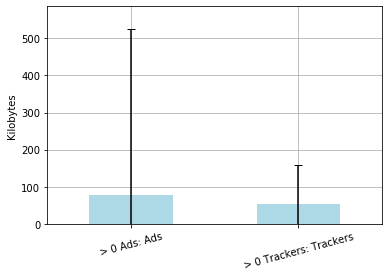

In [10]:
fig = plt.figure()

metric = df['Ad Bytes'] # Extract that column
ads_one = metric[metric > 0] # Get all that have greater than 0 bytes

metric = df['Tracker Bytes']
trackers_one = metric[metric > 0] # do same for tracker

# Calculate Medians
total_ad_bytes=ads_one.median()
total_tracker_bytes=trackers_one.median()

# Calculate STD
astd= ads_one.std()
tstd= trackers_one.std()

## Print out the stats for each.
print("Ads:------")
mms(ads_one)
print("Trackers:------")
mms(trackers_one)

# Create new dataframe for plotting
new_data_2=pd.DataFrame([['> 0 Ads: Ads',total_ad_bytes, astd], 
                       ['> 0 Trackers: Trackers',total_tracker_bytes, tstd],
                      ],
                      columns=['Byte Category', 'Kilobytes', 'err'])

# Plot
rax = new_data_2.plot.bar(x='Byte Category', y='Kilobytes', yerr='err', rot=15, capsize=4, color='lightblue', grid=True, ylim=[0,600000.4/div])
rax.set_ylabel('Kilobytes')
rax.set_xlabel('')
rax.get_legend().remove()

# Uncomment below to save to file
#plt.savefig('filtered.pdf', bbox_inches='tight', dpi=fig.dpi)

In [ ]:
##